## MUSIC RECOMENDATION SYSTEM

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
import os
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

filterwarnings('ignore')

In [2]:
data_main = pd.read_csv('top 100 streamed songs.csv').drop(columns=['id'])
data = data_main.drop(columns=['name'])
data_main.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [3]:
data.head()

,id,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


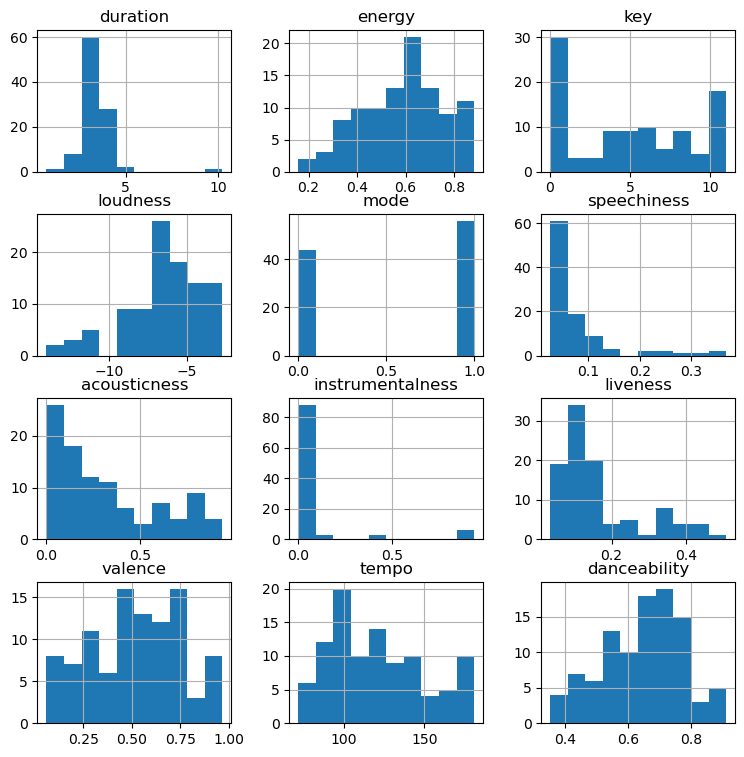

In [4]:
data.hist(figsize = (9,9));

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,100.0,3.404900,0.927022,0.73000,2.910000,3.3700,3.630000,10.220
energy,100.0,0.587650,0.168273,0.15700,0.477750,0.6090,0.707750,0.883
key,100.0,5.050000,3.825420,0.00000,1.000000,5.0000,8.000000,11.000
loudness,100.0,-6.577120,2.447338,-14.06700,-7.676250,-6.2625,-4.786750,-2.724
mode,100.0,0.560000,0.498888,0.00000,0.000000,1.0000,1.000000,1.000
speechiness,100.0,0.075461,0.068065,0.02530,0.036100,0.0518,0.080650,0.368
acousticness,100.0,0.314539,0.281076,0.00028,0.090750,0.2385,0.519750,0.941
instrumentalness,100.0,0.070682,0.221947,0.00000,0.000000,0.0000,0.000083,0.941
liveness,100.0,0.161737,0.112657,0.03410,0.088375,0.1200,0.205250,0.509
valence,100.0,0.517354,0.237512,0.05920,0.329000,0.5420,0.711500,0.967


In [6]:
#select features
data_features = data.iloc[:,1:]
#scale
data_features_scaled = StandardScaler().fit_transform(data_features)

def n_nearest_row(dataframe, inpute_row, n=5):
    print("inpute song:\n", pd.DataFrame(data.iloc[inpute_row,:]).T)
    
    distances = pdist(dataframe.values, metric='euclidean')
    dist_matrix = squareform(distances)
    distances_from_input_row = pd.DataFrame(dist_matrix)[input_row].sort_values()
    
    distances_from_input_row = disances_from_input_row[1:n+1].sort_index()
    nearest_rows = data_main[data.index.isna(distsnces_from_input_row.index)]
    output_data = data.concat((nearest_rows,distances_from_input_row),axis=1)
    
    columns = list(data_main.columns)
    columns.append('distance')
    output_data.columns=columns
    
    return output_df


In [7]:
nearest_5_row = n_nearest_row(data_features,0) # we will examine the first index
#print("\n\nNearest songs: ")
nearest_5_row

inpute song:
                        id duration energy key loudness mode speechiness  \
0  4ZtFanR9U6ndgddUvNcjcG     2.97  0.664   9   -5.044    1       0.154   

  acousticness instrumentalness liveness valence    tempo danceability  
0        0.335              0.0   0.0849   0.688  166.928        0.563  


NameError: name 'input_row' is not defined

In [11]:
#select features
data_features = data.iloc[:,1:]
#scale
data_features_scaled =  StandardScaler().fit_transform(data_features)

def n_nearest_row(dataframe,input_row,n=5):
    print("Input song:\n",pd.DataFrame(data.iloc[input_row,:]).T)

    distances = pdist(dataframe.values, metric='euclidean')
    dist_matrix = squareform(distances)
    distances_from_input_row = pd.DataFrame(dist_matrix)[input_row].sort_values()

    distances_from_input_row = distances_from_input_row[1:n+1].sort_index()
    nearest_rows = data_main[data.index.isin(distances_from_input_row.index)]

    output_df = pd.concat((nearest_rows,distances_from_input_row),axis=1)
    
    columns = list(data_main.columns)
    columns.append("distance")
    output_df.columns=columns

    return output_df



nearest_5_row = n_nearest_row(data_features,96) # we will examine the first index
print("\n\nNearest songs: ")
nearest_5_row



Input song:
                         id duration energy key loudness mode speechiness  \
96  1FSWSs9CL01RCYxXtm08Rf     3.37  0.748  11   -5.922    0      0.0589   

   acousticness instrumentalness liveness valence    tempo danceability  
96        0.305              0.0   0.0811   0.964  163.984        0.672  


Nearest songs: 


,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,distance
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.3350,0.000000,0.0849,0.688,166.928,0.563,3.834461
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.3790,0.868000,0.1100,0.454,170.054,0.564,8.816716
47,7BJecfRrRlAay7KGcyz2lq,Cover Me In Sunshine P!nk & Willow Sage Hart,2.37,0.488,5,-11.276,1,0.0568,0.0142,0.900000,0.1560,0.107,160.013,0.543,9.173496
58,3CRDbSIZ4r5MsZ0YwxuEkn,Stressed Out twenty one pilots,3.37,0.637,4,-5.677,0,0.1410,0.0462,0.000023,0.0602,0.648,169.977,0.734,9.228556
80,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage) Post Malone,3.64,0.520,5,-6.136,0,0.0712,0.1240,0.000070,0.1310,0.129,159.801,0.585,7.376203


In [9]:
data_main.shape

(100, 14)

In [10]:
data.shape

(100, 13)